In [28]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import binarize

from sklearn.metrics import roc_curve, auc, precision_recall_curve ##Import any other libraries you may need
from sklearn.metrics import average_precision_score


In [29]:
performances = pd.read_csv('performances.csv')

In [30]:
performances.head()

,ground_truth,probability
0,1,0.99
1,1,0.98
2,1,0.97
3,1,0.96
4,1,0.95


In [13]:
def plot_auc(t_y, p_y):

    ## YOUR CODE HERE
    ## Note you can utilize roc_curve and auc imported above

    fig, c_ax = plt.subplots(1,1, figsize = (10, 6))
    fpr, tpr, thresholds = roc_curve(t_y, p_y)
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % ('Pneumonia', auc(fpr, tpr)))
    c_ax.legend()
    c_ax.set_xlabel('False Positive Rate')
    c_ax.set_ylabel('True Positive Rate')    

    
    
def plot_pr(t_y, p_y):
    ## YOUR CODE HERE
    ## Note you can utilizat precision_recall_curve imported above

    fig, c_ax = plt.subplots(1,1, figsize = (10, 6))
    pr, rc,_ = precision_recall_curve(t_y, p_y)
    c_ax.plot(pr, rc, label = 'Precision-Recall Curve')
    c_ax.legend()
    c_ax.set_xlabel('Precision')
    c_ax.set_ylabel('Recall')     
    
    
    
def calc_f1(prec,recall):
    return 2*(prec*recall)/(prec+recall)

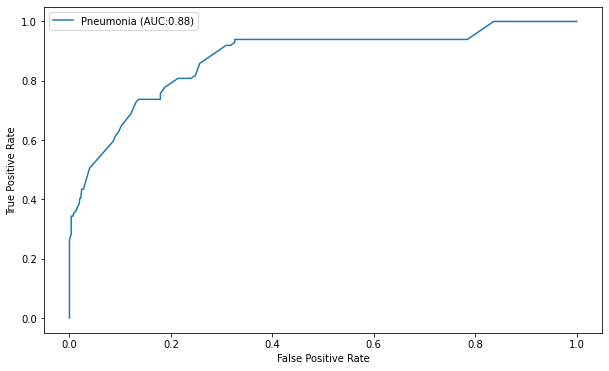

In [14]:
plot_auc(performances['ground_truth'],performances['probability'])

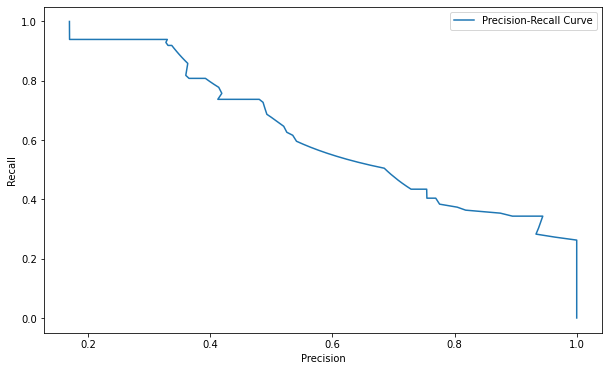

In [15]:
plot_pr(performances['ground_truth'],performances['probability'])

Calculate F1 score for two different scenarios here, one where you choose a threshold that favors precision, and one with a threshold that favors recall: 

In [112]:
### YOUR CODE HERE
def get_stats(dataframe, precision_threshold=False, recall_threshold=False,):
    t = dataframe.copy(deep=True)
    precisions, recalls, thresholds = precision_recall_curve(t['ground_truth'], t['probability'])
    
    # using precision threshold:
    if precision_threshold:
        diff_list = [abs(x-precision_threshold) for x in precisions]
        pre_idx = diff_list.index(min(diff_list))
        
        pre = precisions[pre_idx]
        recall_at_pre = recalls[pre_idx]
        threshold_at_pre = thresholds[pre_idx]        
#         print ('Using Precision Threshold =', precision_threshold)
#         print ('Precision =', pre)
#         print ('Recall =', recall_at_pre)
        print ('Threshold =', threshold_at_pre)
        return pre, recall_at_pre
    
        
    # using recall threshold:
    if recall_threshold:
        diff_list = [abs(x-recall_threshold) for x in recalls]
        rec_idx = diff_list.index(min(diff_list))
        rec = recalls[rec_idx]
        precision_at_rec = precisions[rec_idx]
        threshold_at_rec = thresholds[rec_idx]  
#         print ('Using Recall Threshold =', recall_threshold)
#         print ('Precision =', precision_at_rec)
#         print ('Recall =', rec)
        print ('Threshold =', threshold_at_rec)
        return precision_at_rec, rec
    
    

In [113]:
get_stats(dataframe=performances, recall_threshold=0.9)

Threshold = 0.29


(0.3449612403100775, 0.898989898989899)

In [116]:
p = 0.5
r = 0.5

# Calculate F1 score using precision threshold
prec, rec = get_stats(dataframe=performances, precision_threshold=p)
print ("F1 Sscore =", calc_f1(prec, rec))

# Calculate F1 score using recall threshold
prec, rec = get_stats(dataframe=performances, recall_threshold=r)
print ("F1 Sscore =", calc_f1(prec, rec))


Threshold = 0.54
F1 Sscore = 0.575107296137339
Threshold = 0.68
F1 Sscore = 0.5764705882352941


In [148]:
from sklearn.metrics import f1_score

cutoff = 0.68
f1_list = []
# cutoffs = np.arange(0,1,0.02).tolist()
cutoffs=[0.9]
for m in cutoffs:
    t = performances.copy(deep=True)
    n = []
    for i, r in t.iterrows():
        if r['probability'] >= m: n.append(1)
        else: n.append(0)
    t['new']=n
    f1 = f1_score(t['ground_truth'], t['new'])
    f1_list.append(f1)
    print ("F1 Sscore =",f1 )

    

F1 Sscore = 0.43410852713178294


In [133]:
max_f1_idx= f1_list.index(max(f1_list))
cutoffs[max_f1_idx]|

0.5

Now look at what the _accuracy_ of our model would be using those two threshold values. Hint, you can add a new column with value 0 or 1 as predictions based on the threshold you choose, then you can calculate accuracy using ground truth and the prediction you just made.

Think about why accuracy really isn't a great performance statistic when evaluating and interpreting the utility of our models. 

In [123]:
### YOUR CODE HERE 

np.arange(0,1,0.2).tolist()

[0.0, 0.2, 0.4, 0.6000000000000001, 0.8]